In [1]:
import ect
from ect.optimizers import ECTFilterOptimizer
import matplotlib.pyplot as plt
import numpy as np
import cv2

radius = 200
img_offset = radius/10
ect_offset = radius/5

n_knots = 5

In [2]:
def rms(x: np.ndarray) -> float:
    rms_ = np.sqrt((x*np.conj(x)).sum().sum())
    return rms_

def rmsnorm(x: np.ndarray) -> np.ndarray:
    rms = np.sqrt((x*np.conj(x)).sum().sum())
    return x/rms

def snr(image: cv2.Mat, template: cv2.Mat):
    snr_lin = (1/rms((rmsnorm(image) - rmsnorm(template))))
    return 20*np.log10(snr_lin)

In [3]:
opt = ECTFilterOptimizer(
    image_path = "../sample_imgs/shrek.png",
    radius = radius,
    n_knots = n_knots,
    img_offset = img_offset,
    ect_offset = ect_offset,
    loss_fcn = lambda x, y: -snr(x, y),
    do_snf=False
)

result = opt.optim()
# result = opt.optim(method = "Nelder-Mead")
# solution = result['x'][0]


Current loss=-7.488
Current loss=-8.579
Current loss=-8.790
Current loss=-8.938
Current loss=-9.003
Current loss=-9.043
Current loss=-9.063
Current loss=-9.071
Current loss=-9.074
Current loss=-9.075
Current loss=-9.076
Current loss=-9.078
Current loss=-9.082
Current loss=-9.090
Current loss=-9.150
Current loss=-9.153
Current loss=-9.173
Current loss=-9.182
Current loss=-9.183
Current loss=-9.183
Current loss=-9.183
Current loss=-9.183
Current loss=-9.183
Current loss=-9.183
Current loss=-9.183
Current loss=-9.183
Current loss=-9.183
Current loss=-9.183
Current loss=-9.183
Current loss=-9.183
Current loss=-9.183
Current loss=-9.183
Current loss=-9.184
Current loss=-9.184
Current loss=-9.184
Current loss=-9.184
Current loss=-9.184
Current loss=-9.184
Current loss=-9.184
Current loss=-9.184


In [4]:
result

      fun: -9.18404506580263
 hess_inv: array([[2888.61184831, -551.75097072, -872.17339281, -838.89968954,
        -625.6286099 ],
       [-551.75097072,  125.09319748,  169.90685416,  164.40881481,
          93.50914469],
       [-872.17339281,  169.90685416,  265.88675732,  256.3821329 ,
         181.25315079],
       [-838.89968954,  164.40881481,  256.3821329 ,  249.03891994,
         170.31725571],
       [-625.6286099 ,   93.50914469,  181.25315079,  170.31725571,
         181.72006683]])
      jac: array([-1.19209290e-07,  2.26497650e-06,  2.26497650e-06, -5.48362732e-06,
        1.07288361e-06])
  message: 'Optimization terminated successfully.'
     nfev: 288
      nit: 40
     njev: 48
   status: 0
  success: True
        x: array([ 2.46696342,  3.5831371 ,  1.64548272,  0.84688964, -6.60348979])

opt.loss(solution)=-9.18404506580263


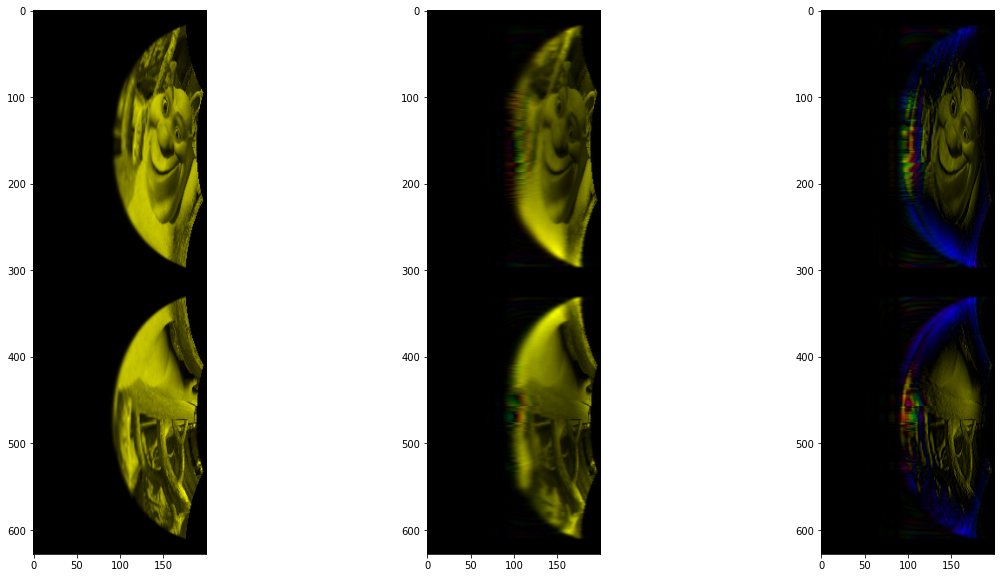

In [5]:
solution = result['x']

opt.show_result(rmsnorm)

print(f"{opt.loss(solution)=}")
# print(f"{opt.loss_sidelobe(solution)=}")

In [6]:
res = opt.inv

knots_freq = solution[:n_knots]
knots_space = solution[n_knots:]

fnf = ect.freqnorm(res.shape[:2], radius, knots_freq)
snf = ect.spacenorm(res.shape[:2], radius, knots_space)

print(f"{knots_freq=}\n{knots_space=}")

ValueError: `x` must contain at least 2 elements.

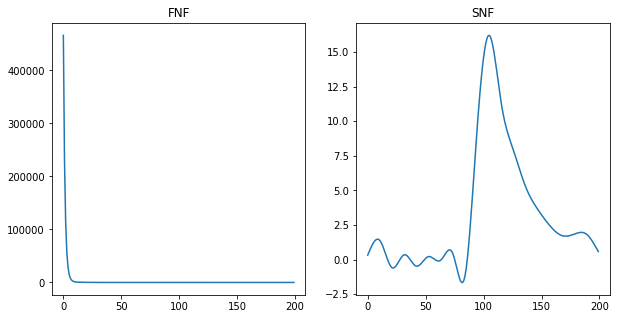

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("FNF")
plt.plot(fnf[0,:])

plt.subplot(1, 2, 2)
plt.title("SNF")
plt.plot(snf[0,:])

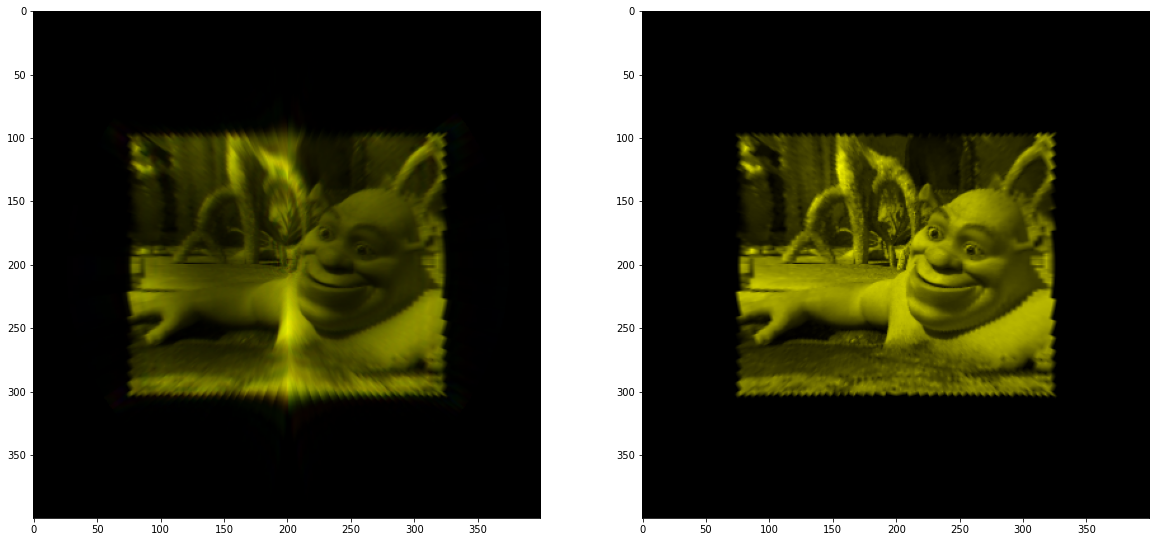

In [ ]:
inv_img = ect.ilogpolar(ect.complex_to_hsv(opt.inv), radius=radius, offset=img_offset)
src_img = ect.ilogpolar(ect.complex_to_hsv(opt.image), radius=radius, offset=img_offset)

plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.imshow(inv_img)

plt.subplot(1, 2, 2)
plt.imshow(src_img)